In [10]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rb_10 = sns.color_palette("RdBu", 10)
rb_2 = rb_10[::len(rb_10)-1]
sns.set_theme(palette=rb_2)

In [11]:
file_path = pathlib.Path().absolute()
df_path = file_path / "data" / "play_by_play_parsed.csv"
df = pd.read_csv(df_path)

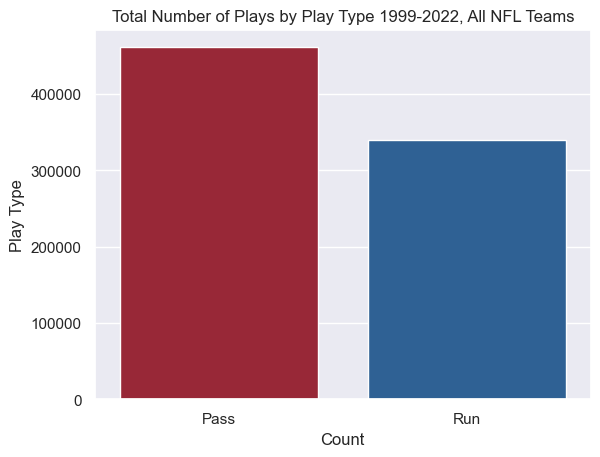

In [12]:
total_plot = sns.countplot(data=df, x='play_type', palette=rb_2)
total_plot.set(
    title="Total Number of Plays by Play Type 1999-2022, All NFL Teams",
    xlabel="Count",
    ylabel="Play Type",
)
total_plot.set_xticklabels(["Pass", "Run"])
plt.show()

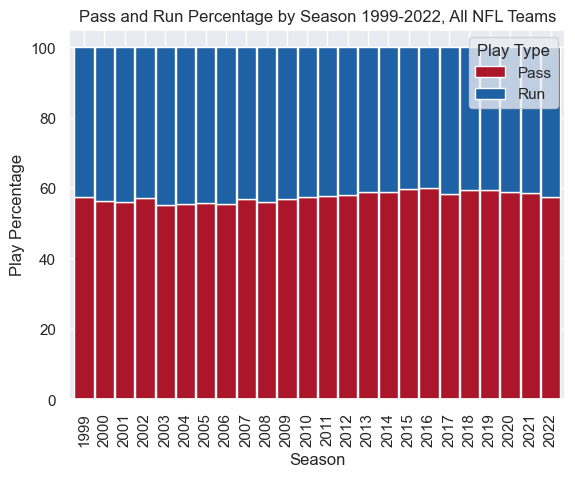

In [15]:
season_df = pd.pivot_table(df, index='season', columns='play_type', aggfunc='size')
season_df = season_df.div(season_df.sum(axis=1), axis=0) * 100


season_df.plot(kind='bar', width=.95, stacked=True, color=rb_2)
plt.title('Pass and Run Percentage by Season 1999-2022, All NFL Teams')
plt.xlabel('Season')
plt.ylabel('Play Percentage')
plt.legend(title='Play Type', labels=['Pass', 'Run'])
plt.show()

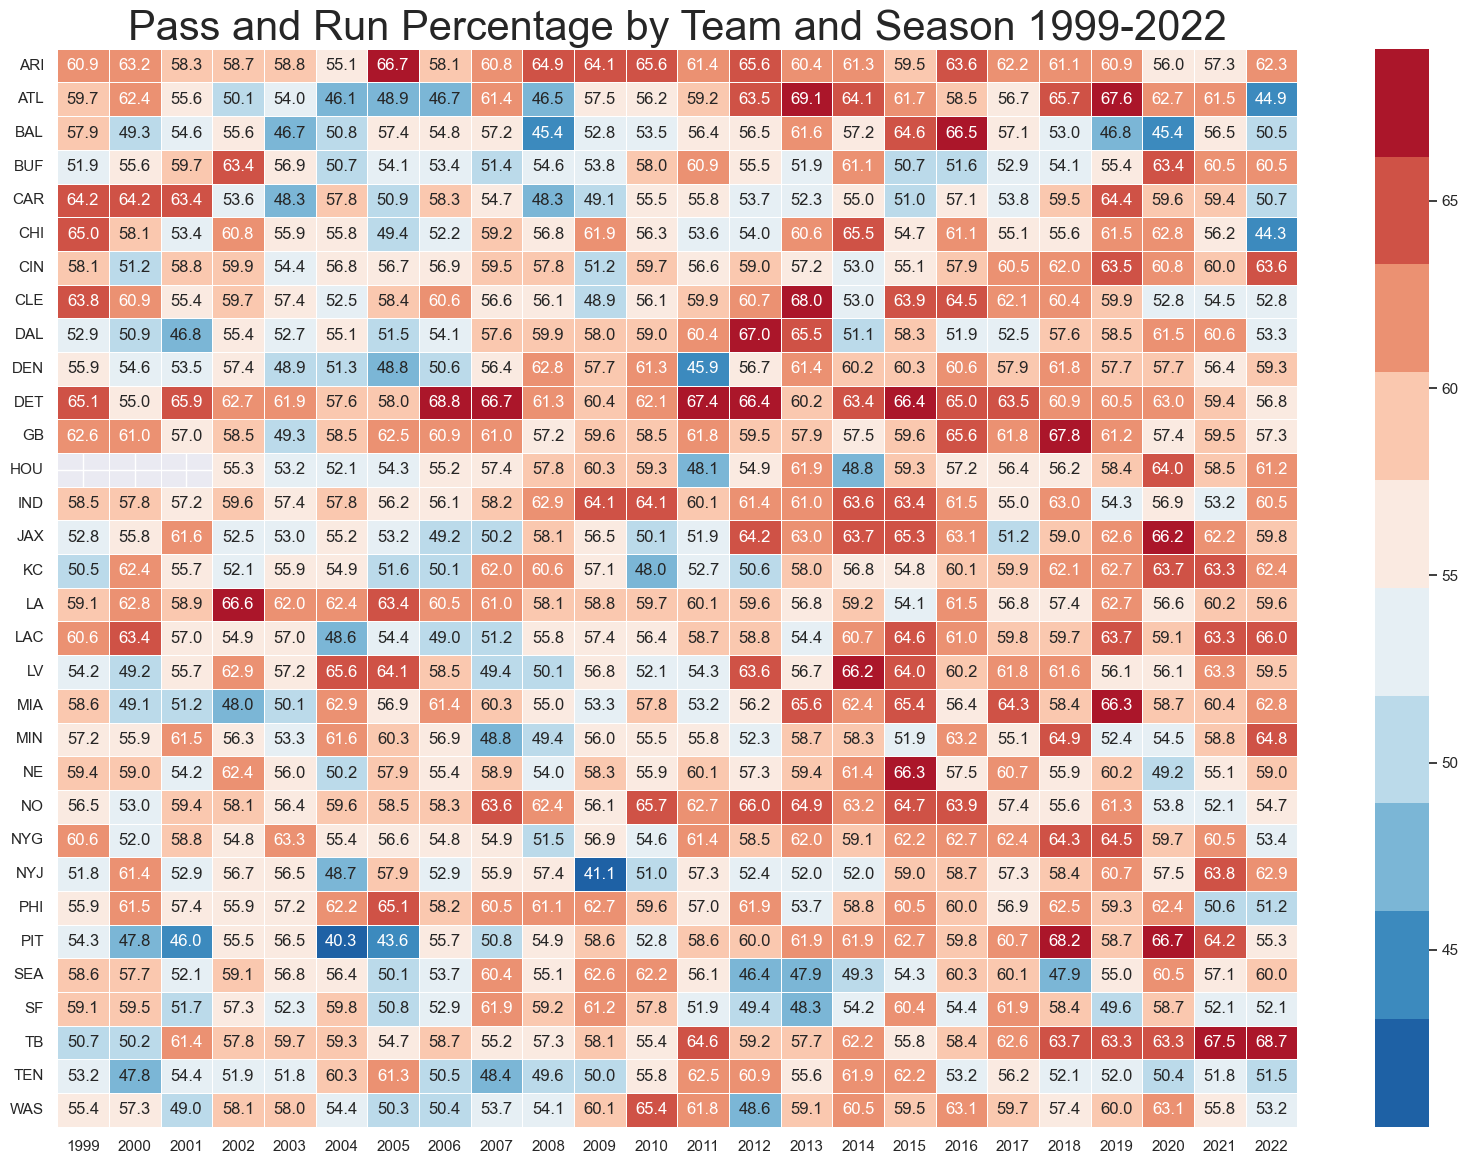

In [19]:
team_df = pd.pivot_table(df, values='play_type', index='posteam', columns='season', aggfunc=lambda x: len(x[x=='pass'])/len(x)*100)

f, ax = plt.subplots(figsize=(20, 14))
heatmap = sns.heatmap(team_df, cmap=rb_10[::-1], annot=True, fmt='.1f', linewidths=.5, ax=ax)
heatmap.set(
    xlabel="",
    ylabel=""
)
plt.title("Pass and Run Percentage by Team and Season 1999-2022", fontsize=30)
y_labels = heatmap.get_yticklabels()
rotated_labels = [label.get_text()[:10] for label in y_labels]
heatmap.set_yticklabels(rotated_labels, rotation=0)
plt.show()

In [20]:
coach_df = pd.pivot_table(df, index='coach', columns='play_type', aggfunc='size')
coach_df = season_df.div(season_df.sum(axis=1), axis=0) * 100

coach_df.sort_values('run').head(10)

play_type,pass,run
season,,
2016,60.012469,39.987531
2015,59.861418,40.138582
2018,59.499970,40.500030
2019,59.343654,40.656346
2013,58.941622,41.058378
2014,58.905898,41.094102
2020,58.897883,41.102117
2021,58.689059,41.310941
2017,58.411634,41.588366


In [21]:
coach_df.sort_values('pass').head(10)

play_type,pass,run
season,,
2003,55.203115,44.796885
2004,55.416160,44.583840
2006,55.416603,44.583397
2005,55.629823,44.370177
2001,56.039304,43.960696
2008,56.088425,43.911575
2000,56.237058,43.762942
2009,56.855995,43.144005
2007,56.987521,43.012479


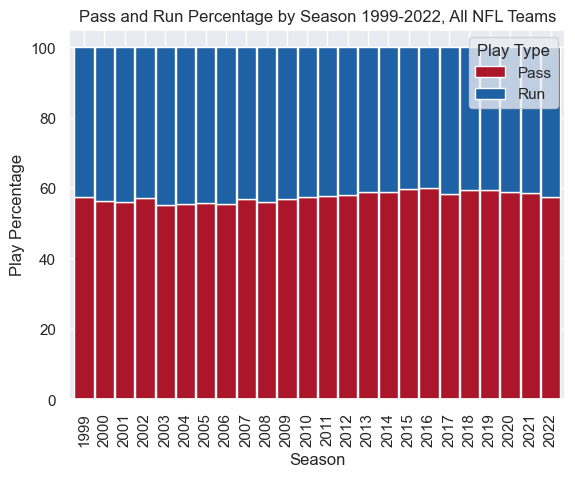

In [22]:
season_df = pd.pivot_table(df, index='season', columns='play_type', aggfunc='size')
season_df = season_df.div(season_df.sum(axis=1), axis=0) * 100


season_df.plot(kind='bar', width=.95, stacked=True)
plt.title('Pass and Run Percentage by Season 1999-2022, All NFL Teams')
plt.xlabel('Season')
plt.ylabel('Play Percentage')
plt.legend(title='Play Type', labels=['Pass', 'Run'])
plt.show()

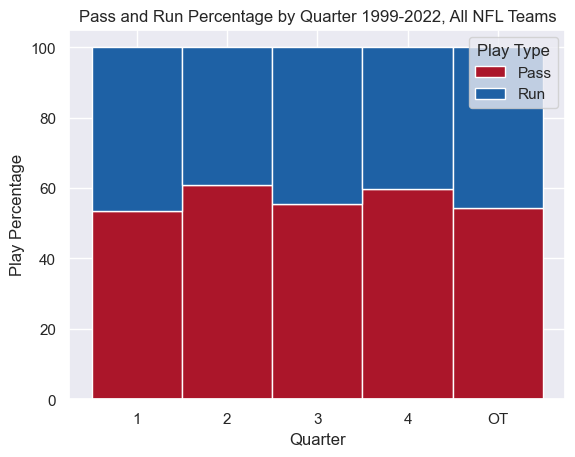

In [23]:
quarter_df = df[df['qtr'] <= 5]
quarter_df = pd.pivot_table(quarter_df, index='qtr', columns='play_type', aggfunc='size')
quarter_df = quarter_df.div(quarter_df.sum(axis=1), axis=0) * 100


ax = quarter_df.plot(kind='bar', width=1, stacked=True)
ax.set_xticklabels([1, 2, 3, 4, "OT"], rotation=0)
plt.title('Pass and Run Percentage by Quarter 1999-2022, All NFL Teams')
plt.xlabel('Quarter')
plt.ylabel('Play Percentage')
plt.legend(title='Play Type', labels=['Pass', 'Run'])
plt.show()

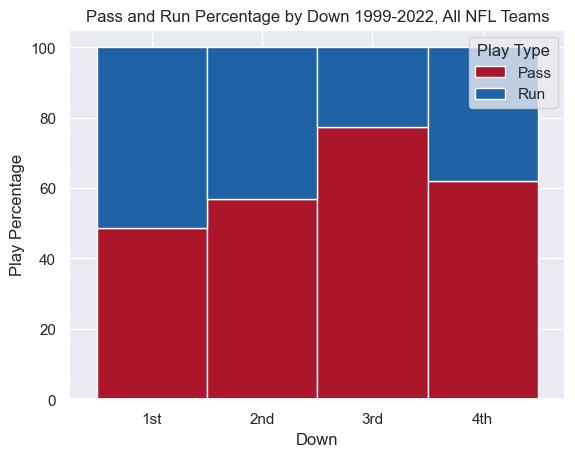

In [24]:
down_df = pd.pivot_table(df, index='down', columns='play_type', aggfunc='size')
down_df = down_df.div(down_df.sum(axis=1), axis=0) * 100


ax = down_df.plot(kind='bar', width=1, stacked=True)
ax.set_xticklabels(["1st", "2nd", "3rd", "4th"], rotation=0)
plt.title('Pass and Run Percentage by Down 1999-2022, All NFL Teams')
plt.xlabel('Down')
plt.ylabel('Play Percentage')
plt.legend(title='Play Type', labels=['Pass', 'Run'])
plt.show()

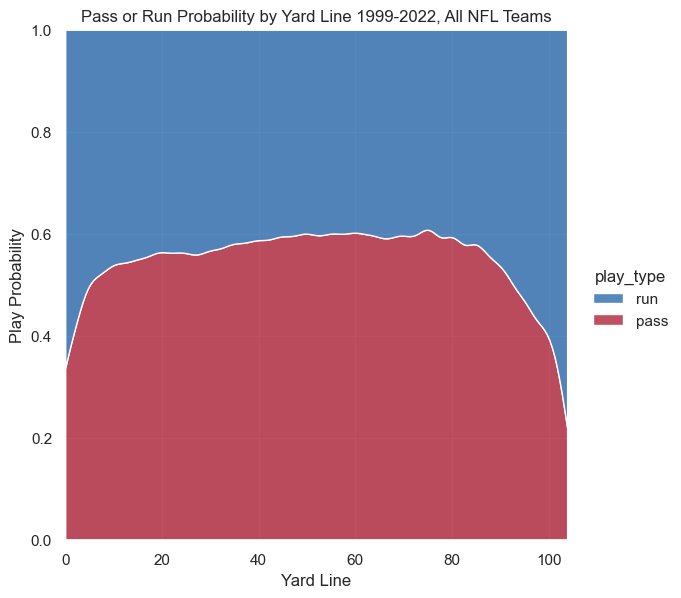

In [25]:
sns.displot(
    data=df,
    x="yardline_100", hue="play_type",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    hue_order=["run", "pass"],
    palette=rb_2[::-1]
)
plt.title('Pass or Run Probability by Yard Line 1999-2022, All NFL Teams')
plt.xlabel('Yard Line')
plt.ylabel('Play Probability')
plt.show()

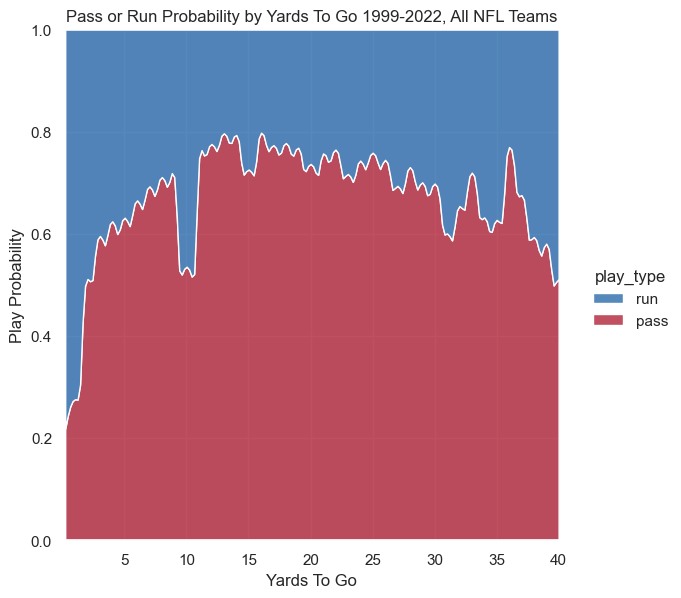

In [26]:
sns.displot(
    data=df,
    x="ydstogo", hue="play_type",
    kind="kde", height=6,
    multiple="fill", clip=(0, 40),
    hue_order=["run", "pass"],
    palette=rb_2[::-1]
)
plt.title('Pass or Run Probability by Yards To Go 1999-2022, All NFL Teams')
plt.xlabel('Yards To Go')
plt.ylabel('Play Probability')
plt.show()


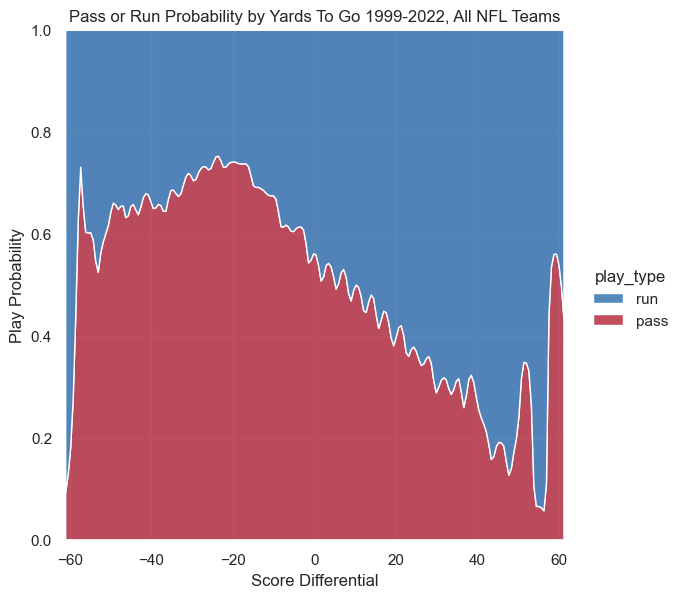

In [27]:
sns.displot(
    data=df,
    x="score_differential", hue="play_type",
    kind="kde", height=6,
    multiple="fill",
    hue_order=["run", "pass"],
    palette=rb_2[::-1]
)
plt.title('Pass or Run Probability by Yards To Go 1999-2022, All NFL Teams')
plt.xlabel('Score Differential')
plt.ylabel('Play Probability')
plt.show()